<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/test_2_WQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (10 points) List the addresses of the ten cameras with the most red light violations. List the addresses of the ten cameras with the most speeding violations.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sns
from calendar import monthrange

In [2]:
map = pd.read_csv("https://raw.githubusercontent.com/jamesqiu2021/DSCI-401-QW/main/Map_-_Speed_Camera_Locations.csv")

In [3]:
map.head()

,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,LATITUDE,LONGITUDE,LOCATION
0,819 E 71st St (Speed Camera),EB,WB,8/20/2018,41.765836,-87.603600,"(41.765836, -87.6036)"
1,6125 N Cicero Ave (Speed Camera),NB,SB,3/17/2014,41.992119,-87.748477,"(41.9921194114274, -87.74847678515228)"
2,3137 W Peterson (Speed Camera),EB,WB,1/3/2014,41.990282,-87.709500,"(41.9902819135942, -87.7095)"
3,2080 W Pershing Rd (Speed Camera),EB,WB,9/7/2013,41.823116,-87.676366,"(41.823116, -87.676366)"
4,1330 W 76th St(Speed Camera),EB,WB,7/9/2021,41.756049,-87.657060,"(41.75604940593661, -87.65705959049882)"


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Red_Light_Camera_Violations.csv to Red_Light_Camera_Violations.csv
Saving Speed_Camera_Violations.csv to Speed_Camera_Violations.csv


In [6]:
speed=pd.read_csv("Speed_Camera_Violations.csv")
red=pd.read_csv('Red_Light_Camera_Violations.csv')
print(speed.head(5))
print(red.head(5))

           ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  X COORDINATE  \
0  1111 N HUMBOLDT    CHI010      4/10/2015          67           NaN   
1  1111 N HUMBOLDT    CHI010      4/25/2015          71           NaN   
2  1111 N HUMBOLDT    CHI010      4/14/2015          38           NaN   
3  1111 N HUMBOLDT    CHI010      4/16/2015          55           NaN   
4  1111 N HUMBOLDT    CHI010      4/24/2015          54           NaN   

   Y COORDINATE  LATITUDE  LONGITUDE LOCATION  
0           NaN       NaN        NaN      NaN  
1           NaN       NaN        NaN      NaN  
2           NaN       NaN        NaN      NaN  
3           NaN       NaN        NaN      NaN  
4           NaN       NaN        NaN      NaN  
                 INTERSECTION  CAMERA ID                 ADDRESS  \
0  IRVING PARK AND KILPATRICK     2763.0  4700 W IRVING PARK ROA   
1       VAN BUREN AND WESTERN     2054.0  2400 W VAN BUREN STREE   
2           115TH AND HALSTED     2552.0   11500 S HALSTED STREE   
3

In [7]:
#top 10 red light violation 
red.groupby("CAMERA ID",as_index=False).agg(V = pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="V",ascending=False).head(10)

,CAMERA ID,V
82,1413.0,157853
251,2251.0,156616
211,2052.0,89413
333,2654.0,84327
303,2503.0,82709
217,2081.0,64813
253,2261.0,60491
103,1514.0,60349
359,3052.0,58402
67,1344.0,56757


In [8]:
# top 10 speed violation
speed.groupby("CAMERA ID",as_index=False).agg(V = pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="V",ascending=False).head(10)

,CAMERA ID,V
131,CHI149,527452
36,CHI045,515912
22,CHI029,410536
0,CHI003,381955
102,CHI120,379678
14,CHI021,357600
65,CHI079,308834
77,CHI095,301062
129,CHI147,297504
6,CHI010,272418


2. (10 points) Using the red light data, make a line plot with month on the
x-axis and total violations on the y-axis with a separate line for weekends
(i.e. Saturday and Sunday) and weekdays (i.e. Monday through Friday).
What month has the most red light violations on the weekends? What
month has the most red light violations on the weekdays?

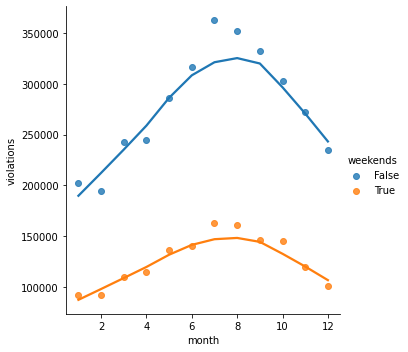

In [9]:
red1=red
red1["date"]=pd.to_datetime(red1['VIOLATION DATE'])
red1['month']=red1['date'].dt.month
red1['day']=red1['date'].dt.dayofweek
red1['weekends']=np.where(((red1.day==5)|(red1.day==6)),True,False)
red1.head(5)

red2=red1.groupby(["month",'weekends'],as_index=False).agg(violations=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="violations",ascending=False)
red2

plot=sns.lmplot (x= "month", y = "violations", hue = 'weekends', lowess=True, data = red2)
plot

# July has the most red light violations on both the weekends and the weekdays.

3. (20 points) Create a table that displays the ratio of total speeding violations to total red light violations by month. Which month has the largest ratio and which month has the smallest ratio?

In [10]:
speed1=speed
speed1['date']=pd.to_datetime(speed1['VIOLATION DATE'])
speed1['month']=speed1['date'].dt.month 
speed1=speed1.groupby('month',as_index=False).agg(s_violations=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum'))
print(speed1)                             

red3=red
red3['date']=pd.to_datetime(red3['VIOLATION DATE'])
red3['month']=red3['date'].dt.month 
red3=red3.groupby('month',as_index=False).agg(r_violations=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum'))
print(red3)   

merge1=pd.merge(speed1,red3,left_on="month",right_on="month",how="inner")
print(merge1)
merge1['ratio']=merge1['s_violations']/merge1['r_violations']
merge1.sort_values(by="ratio",ascending=False)

# March had the largest ratio and August had the smallest ratio. 

    month  s_violations
0       1        661621
1       2        623906
2       3       1134194
3       4       1102943
4       5       1203774
5       6       1071001
6       7       1214637
7       8       1056128
8       9       1192555
9      10       1170137
10     11        960048
11     12        803271
    month  r_violations
0       1        294740
1       2        286967
2       3        351636
3       4        360228
4       5        423381
5       6        457179
6       7        525644
7       8        513299
8       9        478720
9      10        448142
10     11        392403
11     12        335428
    month  s_violations  r_violations
0       1        661621        294740
1       2        623906        286967
2       3       1134194        351636
3       4       1102943        360228
4       5       1203774        423381
5       6       1071001        457179
6       7       1214637        525644
7       8       1056128        513299
8       9       1192555        478

,month,s_violations,r_violations,ratio
2,3,1134194,351636,3.225477
3,4,1102943,360228,3.061791
4,5,1203774,423381,2.843240
9,10,1170137,448142,2.611085
8,9,1192555,478720,2.491133
10,11,960048,392403,2.446587
11,12,803271,335428,2.394764
5,6,1071001,457179,2.342629
6,7,1214637,525644,2.310760
0,1,661621,294740,2.244761


4. (20 points) Using only speed cameras with a latitude greater than or equal to 41.99, create a table with address as the rows, month as the column,and violations per day (i.e. total violations divided by the number of days in the month) in the table. (Note: For simplicity, assume February always has 28 days).

In [11]:
# Remove the "(Speed Camera)" from map table so it can merge with speed table 
map2=map
map2['ADDRESS']=map2['ADDRESS'].str.replace('Speed Camera','')
map2['ADDRESS']=map2['ADDRESS'].str.replace('(','')
map2['ADDRESS']=map2['ADDRESS'].str.replace(')','')
print(map2.head(5))

speed3=speed
speed3['date']=pd.to_datetime(speed3['VIOLATION DATE'])
speed3=speed3.loc[:,['ADDRESS','CAMERA ID','VIOLATION DATE','VIOLATIONS']]
print(speed3.head(5))

map2['ADDRESS']=map2['ADDRESS'].str.strip()
map2['ADDRESS']=map2['ADDRESS'].str.upper()
print(map2.head(5))

merge=pd.merge(map2,speed3,left_on="ADDRESS",right_on="ADDRESS",how="inner")
print(merge.head(5)) #merge the tables

#generate date, month, and monthdays
merge['date']=pd.to_datetime(merge['VIOLATION DATE'])
merge['month']=merge['date'].dt.month
merge['year']=merge['date'].dt.year
merge['monthdays']=merge['date'].dt.days_in_month
print(merge.head(5)) 


<ipython-input-11-42a345762ccc>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  map2['ADDRESS']=map2['ADDRESS'].str.replace('(','')
<ipython-input-11-42a345762ccc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  map2['ADDRESS']=map2['ADDRESS'].str.replace(')','')


               ADDRESS FIRST APPROACH SECOND APPROACH GO-LIVE DATE   LATITUDE  \
0       819 E 71st St              EB              WB    8/20/2018  41.765836   
1   6125 N Cicero Ave              NB              SB    3/17/2014  41.992119   
2     3137 W Peterson              EB              WB     1/3/2014  41.990282   
3  2080 W Pershing Rd              EB              WB     9/7/2013  41.823116   
4       1330 W 76th St             EB              WB     7/9/2021  41.756049   

   LONGITUDE                                 LOCATION  
0 -87.603600                    (41.765836, -87.6036)  
1 -87.748477   (41.9921194114274, -87.74847678515228)  
2 -87.709500             (41.9902819135942, -87.7095)  
3 -87.676366                  (41.823116, -87.676366)  
4 -87.657060  (41.75604940593661, -87.65705959049882)  
           ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS
0  1111 N HUMBOLDT    CHI010      4/10/2015          67
1  1111 N HUMBOLDT    CHI010      4/25/2015          71
2  1111 N

In [12]:
q4=merge[merge.LATITUDE>=41.99]
q4['vm']=q4['VIOLATIONS']/q4['monthdays']
q5=q4.groupby(['ADDRESS','month'],as_index=False).agg(v_d=pd.NamedAgg(column ='vm', aggfunc='sum'))
print(q5.head(12))

#q4 %>% pivot_wider(names_from = month,values_from = v_d) #pivot_wider
q5_wider=pd.pivot(q5,index="ADDRESS",columns="month",values="v_d")
q5_wider


            ADDRESS  month         v_d
0   3137 W PETERSON      1  300.903226
1   3137 W PETERSON      2  276.322660
2   3137 W PETERSON      3  519.741935
3   3137 W PETERSON      4  562.433333
4   3137 W PETERSON      5  545.032258
5   3137 W PETERSON      6  567.366667
6   3137 W PETERSON      7  652.387097
7   3137 W PETERSON      8  533.193548
8   3137 W PETERSON      9  485.566667
9   3137 W PETERSON     10  435.419355
10  3137 W PETERSON     11  376.800000
11  3137 W PETERSON     12  314.516129


<ipython-input-12-bdc78c5e50e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4['vm']=q4['VIOLATIONS']/q4['monthdays']


month,1,2,3,4,5,6,7,8,9,10,11,12
ADDRESS,,,,,,,,,,,,
3137 W PETERSON,300.903226,276.322660,519.741935,562.433333,545.032258,567.366667,652.387097,533.193548,485.566667,435.419355,376.800000,314.516129
4674 W PETERSON AVE,67.645161,74.869458,125.258065,88.533333,111.645161,71.200000,26.645161,10.806452,104.100000,100.225806,84.000000,63.741935
6125 N CICERO AVE,53.548387,66.476601,109.903226,86.966667,92.806452,77.633333,22.258065,17.161290,150.166667,125.548387,74.600000,52.806452
6523 N WESTERN,247.580645,238.062808,427.612903,480.166667,495.096774,528.900000,604.096774,554.935484,541.500000,506.129032,422.033333,333.774194


5. (20 points) Using only speed cameras with a latitude greater than or equal to 41.9 (This is a slightly larger area than the previous question), find the five closest red light cameras to EACH of the speed cameras that meet the condition to form a group of red light cameras. For each group of red light cameras, compute the total number of red light violations in the years 2020 and 2021. What group of red light cameras had the most violations? What group of red light cameras had the fewest violations?

In [13]:
# find the speed cameras whose latitude is more than 41.9.
q5_speed=merge[merge.LATITUDE>=41.9].loc[:,['CAMERA ID','LATITUDE','LONGITUDE']].drop_duplicates()
q5_speed.head(5)
#there are 50 speed cameras that meet the condition

# Data wrangling Data wrangling  
red_q5=red.loc[:,['CAMERA ID','VIOLATION DATE','VIOLATIONS','LATITUDE','LONGITUDE']].dropna()
red_q5['v.date']=pd.to_datetime(red_q5['VIOLATION DATE'])
red_q5['year']=red_q5['v.date'].dt.year
red_q5.head(5) # drop the cameras which don't have lat and long location, and extract year from the date.

q5_red=red_q5.loc[:,['CAMERA ID','LATITUDE','LONGITUDE']].drop_duplicates()
q5_red.head(5)  # check how many red cameras are available (347)

r1=q5_red.loc[:,['CAMERA ID']]
r1.columns=['r_cameraID']
r1.head()

s1=q5_speed.loc[:,['CAMERA ID']]
s1.columns=['s_cameraID']
s1.head()

# cross join 
merge_cross=r1.merge(s1,how='cross')
print(merge_cross.head())

r2=q5_red
r2.columns=['r_cameraID','r_LAT','r_LONG']
print(r2.head())

s2=q5_speed
s2.columns=['s_cameraID','s_LAT','s_LONG']
print(s2.head())

distant=pd.merge(merge_cross,r2,on="r_cameraID")
distant=pd.merge(distant,s2,on="s_cameraID")
print(distant.head())



   r_cameraID s_cameraID
0      2141.0     CHI114
1      2141.0     CHI024
2      2141.0     CHI050
3      2141.0     CHI027
4      2141.0     CHI156
    r_cameraID      r_LAT     r_LONG
7       2141.0  41.808378 -87.684571
9       1211.0  41.997818 -87.690033
13      1612.0  41.946164 -87.747215
15      1413.0  41.940241 -87.639639
18      1814.0  41.895705 -87.702219
      s_cameraID      s_LAT     s_LONG
608       CHI114  41.992119 -87.748477
1905      CHI024  41.990282 -87.709500
6019      CHI050  41.953330 -87.764267
9021      CHI027  41.945963 -87.688384
22737     CHI156  41.986119 -87.787741
   r_cameraID s_cameraID      r_LAT     r_LONG      s_LAT     s_LONG
0      2141.0     CHI114  41.808378 -87.684571  41.992119 -87.748477
1      1211.0     CHI114  41.997818 -87.690033  41.992119 -87.748477
2      1612.0     CHI114  41.946164 -87.747215  41.992119 -87.748477
3      1413.0     CHI114  41.940241 -87.639639  41.992119 -87.748477
4      1814.0     CHI114  41.895705 -87.702219  4

In [14]:
#cannot find a function in python like distHaversine. Found a function written by rochacbruno:https://gist.github.com/rochacbruno/2883505
import math

def distance(lat1,lon1,lat2,lon2):
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#test the function: 
distance(41.992119,-87.748477,41.808378,-87.684571)

#apply the function to generate a varible for distance  
distant['dist']=distant[['r_LAT','r_LONG','s_LAT','s_LONG']].apply(lambda x:distance(*x),axis=1)
print(distant.head())

r3=red_q5.loc[:,['CAMERA ID','VIOLATIONS','v.date','year']]
r3.columns=['r_cameraID','VIOLATIONS','v.date','year']
r3.head()

q5_merge3=pd.merge(distant,r3,on='r_cameraID')
q5_merge3.head()

q5_merge4=q5_merge3.loc[:,['r_cameraID','s_cameraID','dist','VIOLATIONS','v.date','year']]
q5_merge4.head() # The final working table 


   r_cameraID s_cameraID      r_LAT     r_LONG      s_LAT     s_LONG  \
0      2141.0     CHI114  41.808378 -87.684571  41.992119 -87.748477   
1      1211.0     CHI114  41.997818 -87.690033  41.992119 -87.748477   
2      1612.0     CHI114  41.946164 -87.747215  41.992119 -87.748477   
3      1413.0     CHI114  41.940241 -87.639639  41.992119 -87.748477   
4      1814.0     CHI114  41.895705 -87.702219  41.992119 -87.748477   

        dist  
0  21.104568  
1   4.871205  
2   5.111126  
3  10.688733  
4  11.383049  


,r_cameraID,s_cameraID,dist,VIOLATIONS,v.date,year
0,2141.0,CHI114,21.104568,3,2019-06-05,2019
1,2141.0,CHI114,21.104568,4,2019-06-06,2019
2,2141.0,CHI114,21.104568,5,2019-06-07,2019
3,2141.0,CHI114,21.104568,1,2019-06-08,2019
4,2141.0,CHI114,21.104568,2,2019-06-09,2019


In [38]:
#Test one speed camera: CHI114 and find five closest red cameras 
t5=q5_merge4[q5_merge4.s_cameraID=='CHI049'][(q5_merge4.year==2020)|(q5_merge4.year==2021)].groupby(['s_cameraID','r_cameraID','dist'],as_index=False).agg(V=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="dist",ascending=True).head(5)
t5

#Generate a function
def head5(s_camera):
  out = q5_merge4[q5_merge4.s_cameraID == s_camera][(q5_merge4.year==2020)|(q5_merge4.year==2021)].groupby(['s_cameraID','r_cameraID','dist'],as_index=False).agg(V=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="dist",ascending=True).head(5)
  return(out)

print(head5("CHI049")) # test the function

s_cameras=q5_merge4['s_cameraID'].drop_duplicates()
print(s_cameras.head(5))  # pull the s cameras 
type(s_cameras)


<ipython-input-38-927dc8318583>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t5=q5_merge4[q5_merge4.s_cameraID=='CHI049'][(q5_merge4.year==2020)|(q5_merge4.year==2021)].groupby(['s_cameraID','r_cameraID','dist'],as_index=False).agg(V=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="dist",ascending=True).head(5)
<ipython-input-38-927dc8318583>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out = q5_merge4[q5_merge4.s_cameraID == s_camera][(q5_merge4.year==2020)|(q5_merge4.year==2021)].groupby(['s_cameraID','r_cameraID','dist'],as_index=False).agg(V=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="dist",ascending=True).head(5)


    s_cameraID  r_cameraID      dist     V
32      CHI049      1183.0  0.094107   872
31      CHI049      1182.0  0.097651   990
28      CHI049      1163.0  0.830512  1404
27      CHI049      1161.0  0.837576   837
114     CHI049      1683.0  0.905478  1311
0        CHI114
2776     CHI024
5552     CHI050
8328     CHI027
11104    CHI156
Name: s_cameraID, dtype: object


pandas.core.series.Series

In [57]:
#Iteration
violations=list(s_cameras.apply(head5))
violations


<ipython-input-38-927dc8318583>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out = q5_merge4[q5_merge4.s_cameraID == s_camera][(q5_merge4.year==2020)|(q5_merge4.year==2021)].groupby(['s_cameraID','r_cameraID','dist'],as_index=False).agg(V=pd.NamedAgg(column ='VIOLATIONS', aggfunc='sum')).sort_values(by="dist",ascending=True).head(5)


[    s_cameraID  r_cameraID      dist     V
 36      CHI114      1204.0  0.234922   768
 35      CHI114      1202.0  0.238568  2118
 280     CHI114      3032.0  2.403428   854
 279     CHI114      3022.0  2.446203  2881
 16      CHI114      1102.0  2.474677  2040,
    s_cameraID  r_cameraID      dist     V
 49     CHI024      1311.0  0.822614   578
 50     CHI024      1313.0  0.829950  1927
 51     CHI024      1321.0  1.146588   493
 52     CHI024      1323.0  1.153198  2251
 2      CHI024      1011.0  1.626628  2600,
     s_cameraID  r_cameraID      dist     V
 32      CHI050      1183.0  0.231452   872
 31      CHI050      1182.0  0.238483   990
 114     CHI050      1683.0  0.844764  1311
 113     CHI050      1682.0  0.852338  1390
 28      CHI050      1163.0  1.040075  1404,
    s_cameraID  r_cameraID      dist     V
 93     CHI027      1562.0  0.095349  2338
 94     CHI027      1563.0  0.097705  1958
 72     CHI027      1434.0  1.521060   820
 71     CHI027      1431.0  1.528716  3

In [62]:

type(violations)
v = pd.concat(violations) # convert the list to a DF
v.head(5)
v_high=v.groupby('s_cameraID',as_index=False).agg(v=pd.NamedAgg(column ='V', aggfunc='sum')).sort_values(by="v",ascending=False)
print(v_high.head(5))
print(v_high.tail(5))


   s_cameraID      v
26     CHI093  31163
25     CHI092  28953
23     CHI090  28953
24     CHI091  28953
42     CHI161  21461
   s_cameraID     v
6      CHI040  7489
5      CHI039  7489
19     CHI083  6837
12     CHI050  5967
11     CHI049  5414


In [65]:
most_V=v[v.s_cameraID=="CHI093"]
print(most_V) # list of red camera ID for the group with the most violations
fewest_V=v[v.s_cameraID=="CHI049"]
fewest_V # list of red camera ID for the group with the fewest violations

   s_cameraID  r_cameraID      dist      V
11     CHI093      1052.0  0.143114    780
10     CHI093      1051.0  0.143114   2414
54     CHI093      1344.0  1.143164  14825
53     CHI093      1343.0  1.143164   3082
20     CHI093      1122.0  1.218115  10062


,s_cameraID,r_cameraID,dist,V
32,CHI049,1183.0,0.094107,872
31,CHI049,1182.0,0.097651,990
28,CHI049,1163.0,0.830512,1404
27,CHI049,1161.0,0.837576,837
114,CHI049,1683.0,0.905478,1311


# The group which is closest to the speed camera CHI093 had the most violations. The group which is closest to the speed camera CHI049 had the fewest violations. 

6. (20 points) Join the speed violations data with the speed map data on the
variables address (You've got some cleaning to do!). The speed map data
contain the go live date for each camera, which will tell you how many
days the camera has been active. Using this information, compute the
number of violations per active day for each camera in the city. What are
the addresses of the cameras with the top ten average number of violations
per day? What are the addresses of the bottom ten? (Note: Use the latest
day in the speeding violations data set to calculate the number of active
days for a camera. That is, the number of days a camera is considered
active is the difference between the latest date and the go live date plus 1
(gotta include latest day!).)

In [59]:
# The tables were merged in Q4(please see Q4). The merged table was named merge.
merge1=merge
merge1['go_live_date']=pd.to_datetime(merge1['GO-LIVE DATE'])
print(merge.head())

# the last update for the speed violation dataset I saw was on December 10, 2022.

date1 = pd.to_datetime("2020-12-10")
date1

merge1['active_days']=date1-merge1['go_live_date']
merge1['active_days']=merge1['active_days'].dt.days
merge1['active_days']=merge1['active_days']+1

# What are the addresses of the cameras with the top ten average number of violations per day?

merge1['v_d']=merge1['VIOLATIONS']/merge1['active_days']
print(merge1.head())
merge2=merge1.groupby(['CAMERA ID','ADDRESS'],as_index=False).agg(vd=pd.NamedAgg(column ='v_d', aggfunc='sum')).sort_values(by="vd",ascending=False).head(10)
print(merge2) # The top 10

#The bottom 10
merge3=merge1.groupby(['CAMERA ID','ADDRESS'],as_index=False).agg(vd=pd.NamedAgg(column ='v_d', aggfunc='sum')).sort_values(by="vd",ascending=True).head(10)
print(merge3)


         ADDRESS FIRST APPROACH SECOND APPROACH GO-LIVE DATE   LATITUDE  \
0  819 E 71ST ST             EB              WB    8/20/2018  41.765836   
1  819 E 71ST ST             EB              WB    8/20/2018  41.765836   
2  819 E 71ST ST             EB              WB    8/20/2018  41.765836   
3  819 E 71ST ST             EB              WB    8/20/2018  41.765836   
4  819 E 71ST ST             EB              WB    8/20/2018  41.765836   

   LONGITUDE               LOCATION CAMERA ID VIOLATION DATE  VIOLATIONS  \
0   -87.6036  (41.765836, -87.6036)    CHI181      10/1/2019          10   
1   -87.6036  (41.765836, -87.6036)    CHI181       3/4/2020          19   
2   -87.6036  (41.765836, -87.6036)    CHI181      10/2/2019          19   
3   -87.6036  (41.765836, -87.6036)    CHI181      10/3/2019          24   
4   -87.6036  (41.765836, -87.6036)    CHI181       3/5/2020          15   

        date  month  year  monthdays go_live_date  
0 2019-10-01     10  2019         31   2